In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
face_data = fetch_lfw_people(min_faces_per_person=80)

In [4]:
X = face_data.data
Y = face_data.target

print("Input data size: ", X.shape)
print("Output data size: ", Y.shape)
print("Label names: ", face_data.target_names)

Input data size:  (1140, 2914)
Output data size:  (1140,)
Label names:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
for i in range(5):
    print(f"Class {i} has {(Y==i).sum()} samples")

Class 0 has 236 samples
Class 1 has 121 samples
Class 2 has 530 samples
Class 3 has 109 samples
Class 4 has 144 samples


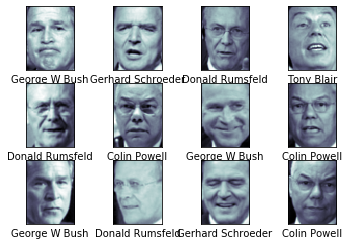

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=face_data.target_names[face_data.target[i]])

plt.show()

In [7]:
# Building SVM-based image classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

# Set class weight to balanced because the dataset size is imbalanced
clf = SVC(class_weight = 'balanced', random_state=42)

# Rather than splitting data into folds and repeatedly write a for loop
# we can use GridSearchCV module instead
# it handles the process implicitly
# we only need to define its hyperparameter

parameter = {
    'C': [0.1, 1, 10],
    'gamma': [1e-07, 1e-08, 1e-06],
    'kernel': ['rbf', 'linear']
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameter, n_jobs = -1, cv = 5)

# The GridSearchCV model we just initialized will conduct five-fold cross-validation
# (cv=5) and will run in parallel on all available cores (n_jobs=-1).

In [8]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
print("The best mode:\n", grid_search.best_params_)
print("The best averaged performance", grid_search.best_score_)

The best mode:
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}
The best averaged performance 0.8514619883040936


In [ ]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)

print(f"The accuracy is: {clf_best.score(X_test,Y_test)*100:.1f}%")

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred, target_names = face_data.target_names))